## Paleomagnetic visualization and analysis associated with Hodgkiss et al. (2019) Belcher Group manuscript

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.patches as mpatches
from cartopy.feature import NaturalEarthFeature, COLORS


Import poles as compiled in Evans and Halls (2010) and filter for poles younger than 2150 Ma.

In [2]:
Superior_poles = pd.read_excel('./data/Evans2010_Superior_poles.xlsx')
Superior_poles_Rhyacian = Superior_poles[Superior_poles.Age < 2150]
Superior_poles_Rhyacian

,Pole,Age,Age_uncertainty,Plat_W_frame,Plon_W_frame,Plat_E_frame,Plon_E_frame,A95,1234567,Q,References
7,Marathon N,2123.5,2126–2121,45.4,198.2,54.1,188.9,7.7,1110100,4,Buchan et al. (1996) and Halls et al. (2008) (W)
8,Marathon R,2103.5,2106–2101,55.1,182.2,63.8,168.9,7.5,111C100,5,Buchan et al. (1996) and Halls et al. (2008) (W)
9,Cauchon Lake (R)a,2091.0,2091 ± 2,53.8,180.9,62.4,167.3,7.7,111C100,5,Halls and Heaman (2000); recalc. Evans and Hal...
10,Fort Frances (R),2076.0,2076 + 5/-4,42.8,184.6,51.5,172.7,6.1,1110100,4,Halls (1986); recalc. Evans and Halls (2010) (W)
11,Lac Esprit (R),2069.0,2069 ± 1,53.3,183.3,62.0,170.5,6.4,1110100,4,Buchan et al. (2007); recalc. Evans and Halls ...
12,Minto (B)a,1998.0,1998 ± 2,30.0,183.2,38.7,171.5,13.1,1110110,5,Buchan et al. (1998); recalc. Evans and Halls ...
13,Molson B + C2 (B)a,1877.0,1877 + 7/-4,28.9,218.0,36.6,209.8,3.8,111C110,6,Zhai et al. (1994) and Halls and Heaman (2000)...


## Plot paleomagnetic poles

Plot paleomagnetic poles in west Superior coordinates with the exception of the Molson B+C2 pole that is plotted in both west and east given uncertainty in the timing of east vs west rotation.

In addition to the poles in the Evans and Halls (2010) compilation, the poles from the Belcher Group are plotted which are:

pole         |     Plon (ºE) |    Plat (ºN) |   A$_{95}$ (º) |  reference     |
 ----------- | :-----------: | :----------: |  :----------:  | :----------:   |
 Eskimo volcanics | 182       | 40          | 12 | Schmidt (1980)|
  Flaherty volcanics | 244       | 0          | 7 | Schmidt (1980)|
   Haig intrusions | 247       | 1          | 6 | Schmidt (1980)|
   
as is the pole from the mainland Eskimo volcanics equivelants which are the Nastapoka basalts from the the mainland east of the Blecher Islands at Richmond Gulf

pole         |     Plon (ºE) |    Plat (ºN) |   A$_{95}$ (º) |  reference     |
 ----------- | :-----------: | :----------: |  :----------:  | :----------:   |
 Nastapoka volcanics | 171       | 39          | 5 | Schwarz and Fujiwara (1981)|

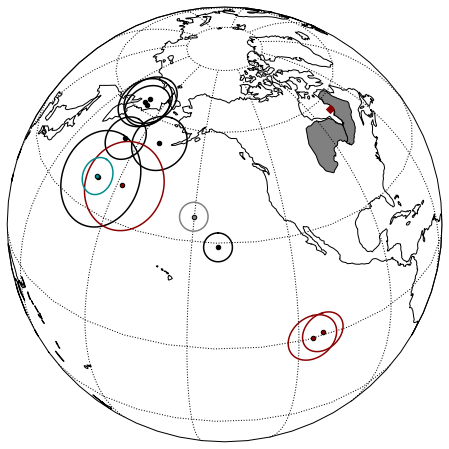

In [3]:
ax = ipmag.make_orthographic_map(central_latitude=35,central_longitude=220,land_color='white')

shpfilename = './data/Superior_Craton_EW.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:
    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      edgecolor='black',facecolor='grey')

ax.plot(-79,56.5,transform=ccrs.PlateCarree(),marker='D',color='darkred',label='study area')

for n in range(0,len(Superior_poles_Rhyacian)-1):
    ipmag.plot_pole(ax,Superior_poles_Rhyacian['Plon_E_frame'].tolist()[n],
                    Superior_poles_Rhyacian['Plat_E_frame'].tolist()[n],
                    Superior_poles_Rhyacian['A95'].tolist()[n])
  
ipmag.plot_pole(ax,209.8,36.6,3.8,color='grey',label='Molson (east Sup. coordinates)')
ipmag.plot_pole(ax,218,28.9,3.8,color='black',label='Molson (west Sup. coordinates)')
ipmag.plot_pole(ax,182,40,12.0,color='darkred',label='Eskimo Volcanics (stratigraphically above 2015 Ma tuff)')
ipmag.plot_pole(ax,244,0,7,color='darkred',label='Flaherty Volcanics (ca. 1870 Ma; 1854 Ma tuff right at top)')
ipmag.plot_pole(ax,247,1,6,color='darkred',label='Haig intrusions')
ipmag.plot_pole(ax,171,39,5,color='darkcyan',label='Nastapoka')

plt.savefig('./figures/Belcher_poles_raw.pdf')
plt.show()

## Figure caption

Figure S17. Paleomagnetic pole positions from the Superior Craton shown in the East Superior Craton references frame (shown in black; as compiled by Halls and Pesonen, 2010) as well as poles for the Eskimo and Flaherty Fms from the Belcher Islands (shown in red; Schmidt, 1980) and the pole for the Eskimo-correlative Nastapoka basalts from the the mainland east of the Blecher Islands at Richmond Gulf (shown in blue; Schwarz and Fujiwara, 1981). Given uncertainty in the timing of rotation between East and West Superior, the Molson Dykes pole is shown in both East and West (grey in italics) coordinates. Restoring the Eskimo volcanics pole to north results in the ca. 2000 Ma reconstruction (which also implements relative rotation between East and West Superior). The Haig intrusions and Flaherty volcanics poles are used for the ca. 1870 Ma reconstruction (an relative East and West Superior rotation is complete).

## Comparision with the Sutton Inlier sill

An additional comparision can be made with the Belcher paleomagnetic poles is with the Sutton Inlier Sill VGP developed by Schwarz et al., 1982. The Sutton Lake inilier is west of James Bay and is part of the West Superior Craton. The Sutton Inlier sill has a U-Pb baddeleyite date of 1870 ± 2 Ma revealing it to be time equivelant to the Haig intrusives (Hamilton et al., 2009) .

Given that the Sutton Inlier Sill paleomagnetic data is from single sill, it is not a time-average paleomagnetic pole which limits the conclusiveness of such a comparison. Nevertheless, such a comparison shows that the pole is very similar to that from the Flaherty volcanics and Haig intrusions which suggests that relative rotation between West and East Superior was complete by 1870 Ma. Evans and Halls (2010) discussed this possibility stating that:
*Concordance of poles from the Haig diabase sills of the Belcher Islands and the Sutton Inlier sill (see Buchan et al., 1998) would also indicate cessation of the west/east Superior rotation by the time of their emplacement, if they were demonstrated to be coeval. Hamilton et al. (2009) show precise U–Pb age equivalence of 1870 Ma between the Sutton Inlier sill and two of the Haig sills. Unfortunately, neither of the dated Haig bodies are the same as those studied paleomagnetically, but an unusual coincidence of factors would be required to generate the pole concordance if the intrusions were of different ages.*
The new dated tuff from just atop on the Flaherty volcanics presented in this work of 1854.2 ± 1.4 Ma supports this overall age constraint and correlation betwen the Haig/Flaherty poles and the Sutton Inlier sill such that their similarity in direction is suggesting of relative rotation between east and west Superior have occured prior to ca. 1870 Ma.

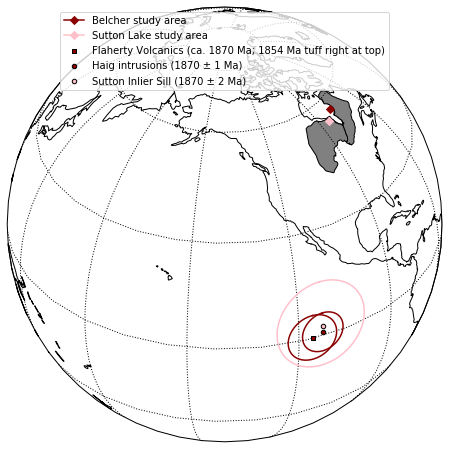

In [4]:
ax = ipmag.make_orthographic_map(central_latitude=35,central_longitude=220,land_color='white')

shpfilename = './data/Superior_Craton_EW.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:
    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      edgecolor='black',facecolor='grey')

ax.plot(-79,56.5,transform=ccrs.PlateCarree(),marker='D',
        color='darkred',label='Belcher study area')
ax.plot(-84.7,54.4,transform=ccrs.PlateCarree(),marker='D',
        color='pink',label='Sutton Lake study area')


ipmag.plot_pole(ax,244,0,7,marker='s',color='darkred',label='Flaherty Volcanics (ca. 1870 Ma; 1854 Ma tuff right at top)')
ipmag.plot_pole(ax,247,1,6,color='darkred',label='Haig intrusions (1870 ± 1 Ma)')

#Sutton Inlier Sill VGP (Schwarz et al., 1982): 67°E, 3°S, dm = 15, dp = 11
ipmag.plot_pole(ax,247,3,13,color='pink',label='Sutton Inlier Sill (1870 ± 2 Ma)')
plt.legend(loc='upper center')
plt.show()

## Belcher paleolatitude

Calculate the colatitude between the Belcher islands and the paleomagnetic pole and subtract from 90 to get the paleolatitude.

In [5]:
Eskimo_paleolatitude = 90-pmag.angle([182,40],[281,56.5])
Eskimo_paleolatitude[0]

28.025838181478534

In [6]:
Molson_paleolatitude = 90-pmag.angle([218,28.9],[281,56.5])
Molson_paleolatitude[0]

38.489492641276286

In [7]:
Haig_paleolatitude = 90-pmag.angle([247,1],[281,56.5])
Haig_paleolatitude[0]

28.168106795859345

In [8]:
Flaherty_paleolatitude = 90-pmag.angle([244,0],[281,56.5])
Flaherty_paleolatitude[0]

26.15471046939603

## Paleogeography supplemental text

Using the new geochronological data presented in this study, combined with the previously published paleomagnetic data from the Eskimo and Flaherty Formations, we revisit the paleogeographic context of the Belcher Group. Paleomagnetic poles for the Superior craton from 2150 to 1850 Ma as compiled by Evans and Halls (2010) are plotted along with poles from the Belcher Group from the Eskimo and Flaherty volcanics (Schmidt, 1980) in Figure S17. The Superior poles are shown in the eastern Superior reference frame accounting for the proposed rotation between the east and west portions of the craton that are separated by the Kapuskasing Structural Zone (Evans and Halls, 2010). The timing of this proposed rotation is between 2.07 and 1.87 Ga.  The Eskimo volcanics pole is constrained to be younger than the 2015.4 ± 1.6 Ma date in the underlying Kasegalik Formation and shares a common mean with the 1998 ± 2 Ma Minto dykes poles (Fig. S17; Buchan et al., 1998). This similarity is consistent with a ca. 2000 Ma age for both and indicates that the Belcher Group is (para)autochthonous with the East Superior craton. This autochthonous interpretation for the Belcher Group is strengthened further by the Eskimo volcanics pole sharing a common mean with the pole calculated from paleomagnetic data of the Nastapoka basalts in the Richmond Gulf area of the mainland east of the Belcher Islands (blue pole in Fig. S17; Schwarz and Fujiwara, 1981). The Eskimo volcanics pole implies a paleolatitude of 28 ± 12º (using a reference point of 281ºW,56.5ºN within the study region). The pole for the Flaherty Fm (Schmidt, 1980) constrained in time between ca. 1870 and 1854.2 ± 1.4 Ma shares a common mean with the pole developed for the Haig intrusions for which there are U-Pb dates of 1870.3 ± 0.7 and 1870.1 ± 1 Ma (Fig. S17). The Haig and Flaherty poles from the Belcher Group are very similar to the time-equivalent virtual geomagnetic pole for the West Superior craton Sutton Inlier sill (which has a U-Pb date of 1870 ± 2 Ma; Hamilton et al., 2009). This similarity supports an interpretation wherein relative rotation between the East and West portions of the Superior craton occurred prior to ca. 1870 Ma. This constraint on the relative rotation is implemented in Figure S17 with the Evans and Halls (2010) Euler pole rotation (51◦ N, 85◦ W, −14◦ CCW) being applied in the ca. 2000 Ma reconstruction, but not in the ca. 1870 Ma reconstruction. 

The Belcher Group poles imply a subtropical position for the basin both at ca. 2000 Ma and 1870 Ma. The paleolatitude at 2000 Ma calculated using the Eskimo pole is 28 ± 12º while at ca. 1870 Ma a paleolatitude of 28 ± 6º is implied by the Haig pole and a paleolatitude of 26 ± 7º is implied by the Flaherty pole. The large difference in pole position with similar resultant paleolatitude is associated with a significant rotation of the Superior craton between ca. 2000 and 1870 Ma (Fig. S17).

New references:
Schwarz EJ, and Fujiwara Y, 1981. Paleomagnetism of the Circum-Ungava Fold Belt II: Proterozoic rocks of Richmond Gulf and Manitounuk Islands. In: Campbell, F.H.A. (ed.),
Proterozoic basins of Canada, Geological Survey of Canada, Paper 81-10, pp. 255-267.

Schwarz, E. J., Clark, K. R. Clark, Fujiwara Y., 1982. Paleomagnetism of the Sutton Lake Proterozoic inlier, Ontario, Canada
Canadian Journal of Earth Sciences, 19:1330-1332, https://doi.org/10.1139/e82-114

## Generate a location map figure for Figure 1 of the main text

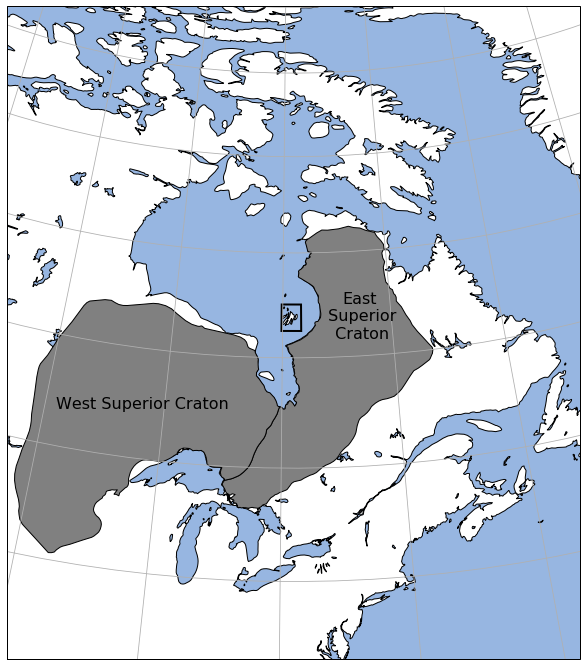

In [9]:
central_lat = 56.5
central_lon = -79
extent = [central_lon-20, central_lon+20, central_lat-20, central_lat+20]

plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
ax.set_extent(extent)
ax.coastlines('50m')

ocean = NaturalEarthFeature(category='physical', name='ocean',
                            scale='50m', facecolor=COLORS['water'])
lakes = NaturalEarthFeature(category='physical', name='lakes',
                            scale='50m', facecolor=COLORS['water'],edgecolor='black')
ax.add_feature(ocean,zorder=0)
ax.add_feature(lakes,zorder=1)

shpfilename = './data/Superior_Craton_EW.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:
    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      edgecolor='black',facecolor='grey')
    


plt.text(-99,50, 'West Superior Craton',
         horizontalalignment='left',fontsize=16,
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-73,55, 'East\n Superior\n Craton',
         horizontalalignment='center',fontsize=16,
         transform=ccrs.Geodetic(),zorder=101)

ax.add_patch(mpatches.Rectangle(xy=[-80.1, 55.5], width=1.8, height=1.5,
                                facecolor='none',edgecolor='black',linewidth=2,
                                transform=ccrs.PlateCarree()))


ax.gridlines()
plt.savefig('./figures/Superior_Craton_map.pdf')

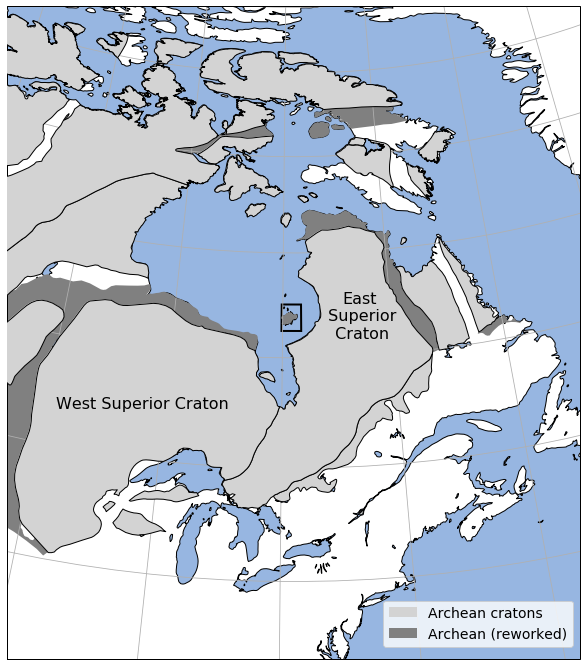

In [10]:
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
ax.set_extent(extent)
ax.coastlines('50m')

ocean = NaturalEarthFeature(category='physical', name='ocean',
                            scale='50m', facecolor=COLORS['water'])
lakes = NaturalEarthFeature(category='physical', name='lakes',
                            scale='50m', facecolor=COLORS['water'],edgecolor='black')
ax.add_feature(ocean,zorder=0)
ax.add_feature(lakes,zorder=1)

shpfilename = './Data/Whitmeyer2007.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=99)
        
Archean = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightgrey")
Reworked_Archean = mpatches.Rectangle((0, 0), 1, 1, facecolor="grey")
labels = ['Archean cratons',
          'Archean (reworked)']
plt.legend([Archean, Reworked_Archean], labels, loc='upper right',
           bbox_to_anchor=(1,0.1), fancybox=True, fontsize = 14)

ax.gridlines()

# plt.text(-97, 47, 'Superior\n Craton\n (west)',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

# plt.text(-72, 53, 'Superior\n Craton\n (east)',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

# plt.text(-107,42, 'Wyoming\n Craton',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

# plt.text(-110.25,48.25, 'Medicine\n Hat',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

# plt.text(-109.5,51.5, 'Hearne',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

# plt.text(-106,61, 'Rae',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

# plt.text(-110,66, 'Slave',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

plt.text(-99,50, 'West Superior Craton',
         horizontalalignment='left',fontsize=16,
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-73,55, 'East\n Superior\n Craton',
         horizontalalignment='center',fontsize=16,
         transform=ccrs.Geodetic(),zorder=101)

ax.add_patch(mpatches.Rectangle(xy=[-80.1, 55.5], width=1.8, height=1.5,
                                facecolor='none',edgecolor='black',linewidth=2,
                                transform=ccrs.PlateCarree()))
plt.savefig('./figures/Craton_map.pdf')
plt.show()